In [18]:
%matplotlib inline
from pprint import pprint

import plot
from simulate import simulate_withdrawals
from harvesting import N_60_RebalanceHarvesting, N_100_RebalanceHarvesting
import harvesting

import itertools
from decimal import Decimal
from montecarlo import conservative
import metrics

/Users/justus/anaconda/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


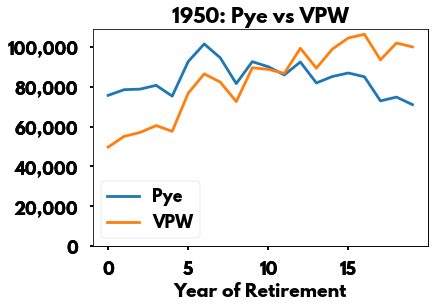

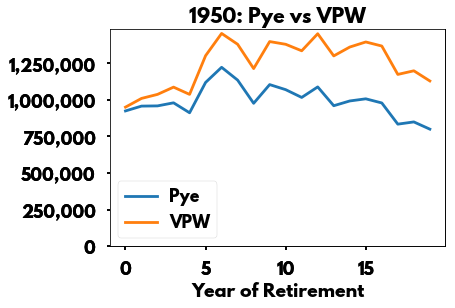

-16066.508552055855
[Decimal('75687.0'),
 Decimal('78537.96799987433944169948162'),
 Decimal('78816.87547157200639796844452'),
 Decimal('80721.72284641860803456600681'),
 Decimal('75298.03717500732846083669919'),
 Decimal('92659.61048743784242110792528'),
 Decimal('101516.9850754338954834672713'),
 Decimal('94532.53623251226025442977225'),
 Decimal('81601.15492983240526776151048'),
 Decimal('92612.44290712010331269167284'),
 Decimal('90053.26530685523852231524924'),
 Decimal('85938.84563801788735357050772'),
 Decimal('92439.62666676373209244405146'),
 Decimal('81923.82894772393081806755984'),
 Decimal('85157.04854414704935719208540'),
 Decimal('86918.34615466436642463953817'),
 Decimal('85013.43396312859238587645941'),
 Decimal('72925.43465109549150105683891'),
 Decimal('74814.78466128626648073729031'),
 Decimal('71031.34647923022278029104280')]


In [23]:
import math
from market import Returns_US_1871
import withdrawal

START_YEAR = 1950

def Pye(p, h):
    vpw = withdrawal.VPW(p, h, years_left=50)
    vpw.stock_growth_rate = Decimal('.08')
    vpw.bond_growth_rate = Decimal('.08')
    return vpw

def compare_em_vs_vpw(series, years=40, title=''):
    (r1, r2) = itertools.tee(series)
    portfolio = (600000, 400000)
    x = simulate_withdrawals(r1, years=years, harvesting=N_60_RebalanceHarvesting, withdraw=Pye, portfolio=portfolio)
    y = simulate_withdrawals(r2, years=years, harvesting=N_60_RebalanceHarvesting, withdraw=withdrawal.VPW, portfolio=portfolio)

    plot.plot_n({'Pye' : [n.withdraw_r for n in x], 'VPW' : [n.withdraw_r for n in y]}, 'Year of Retirement', title)
    plot.plot_n({'Pye' : [n.portfolio_r for n in x], 'VPW' : [n.portfolio_r for n in y]}, 'Year of Retirement', title)
    
    import pprint
    diffs = [a.withdraw_r - b.withdraw_r for (a,b) in zip(x,y)]
    print(metrics.mean(diffs[11:]))
    pprint.pprint([a.withdraw_r for a in x])
    
def ern_vs_vpw(year, years=40):
    compare_em_vs_vpw(Returns_US_1871().iter_from(year), title='%d: Pye vs VPW' % year, years=years)

ern_vs_vpw(START_YEAR, years=20)